# 模型组网

模型组网是深度学习中重要的一环，该环节定义了神经网络的层次结构，数据从输入到输出的计算过程（即前向计算）等。

飞浆提供了多种模型组网方式：
- 直接使用内置模型
- 使用 paddle.nn.Sequential 组网
- 使用 paddle.nn.Layer 组网

另外，可以使用 `paddle.summary` 查看网络结构，每层的输入输出shape和参数信息。

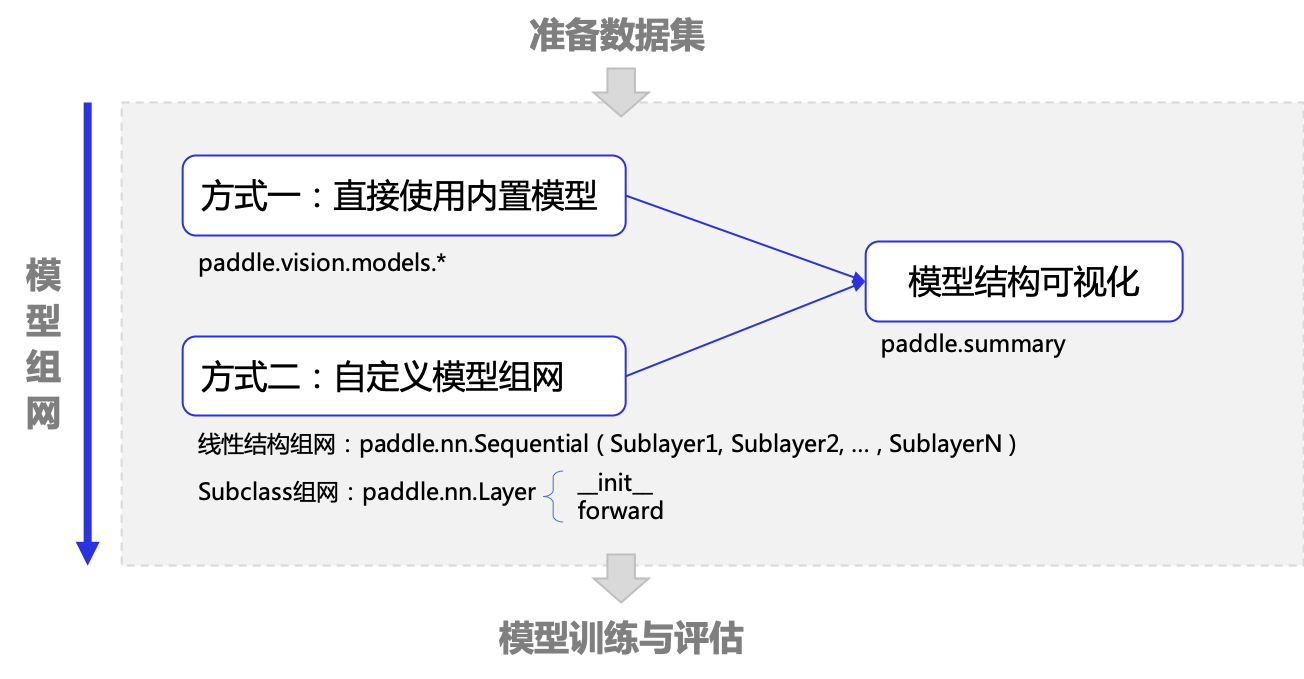

In [8]:
import paddle
from paddle import nn

## 使用内置模型

In [5]:
print('飞浆内置CV领域模型：', paddle.vision.models.__all__)

飞浆内置CV领域模型： ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'resnext50_32x4d', 'resnext50_64x4d', 'resnext101_32x4d', 'resnext101_64x4d', 'resnext152_32x4d', 'resnext152_64x4d', 'wide_resnet50_2', 'wide_resnet101_2', 'VGG', 'vgg11', 'vgg13', 'vgg16', 'vgg19', 'MobileNetV1', 'mobilenet_v1', 'MobileNetV2', 'mobilenet_v2', 'MobileNetV3Small', 'MobileNetV3Large', 'mobilenet_v3_small', 'mobilenet_v3_large', 'LeNet', 'DenseNet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'densenet264', 'AlexNet', 'alexnet', 'InceptionV3', 'inception_v3', 'SqueezeNet', 'squeezenet1_0', 'squeezenet1_1', 'GoogLeNet', 'googlenet', 'ShuffleNetV2', 'shufflenet_v2_x0_25', 'shufflenet_v2_x0_33', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'shufflenet_v2_swish']


In [7]:
# 使用内置模型组网，并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)

# 查看网络结构和参数
paddle.summary(lenet, (1, 1, 28, 28))  # input size

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-7       [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-7        [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
  MaxPool2D-7     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-8       [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-8       [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
  MaxPool2D-8    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-10         [[1, 400]]            [1, 120]           48,120     
   Linear-11         [[1, 120]]            [1, 84]            10,164     
   Linear-12         [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

{'total_params': 61610, 'trainable_params': 61610}

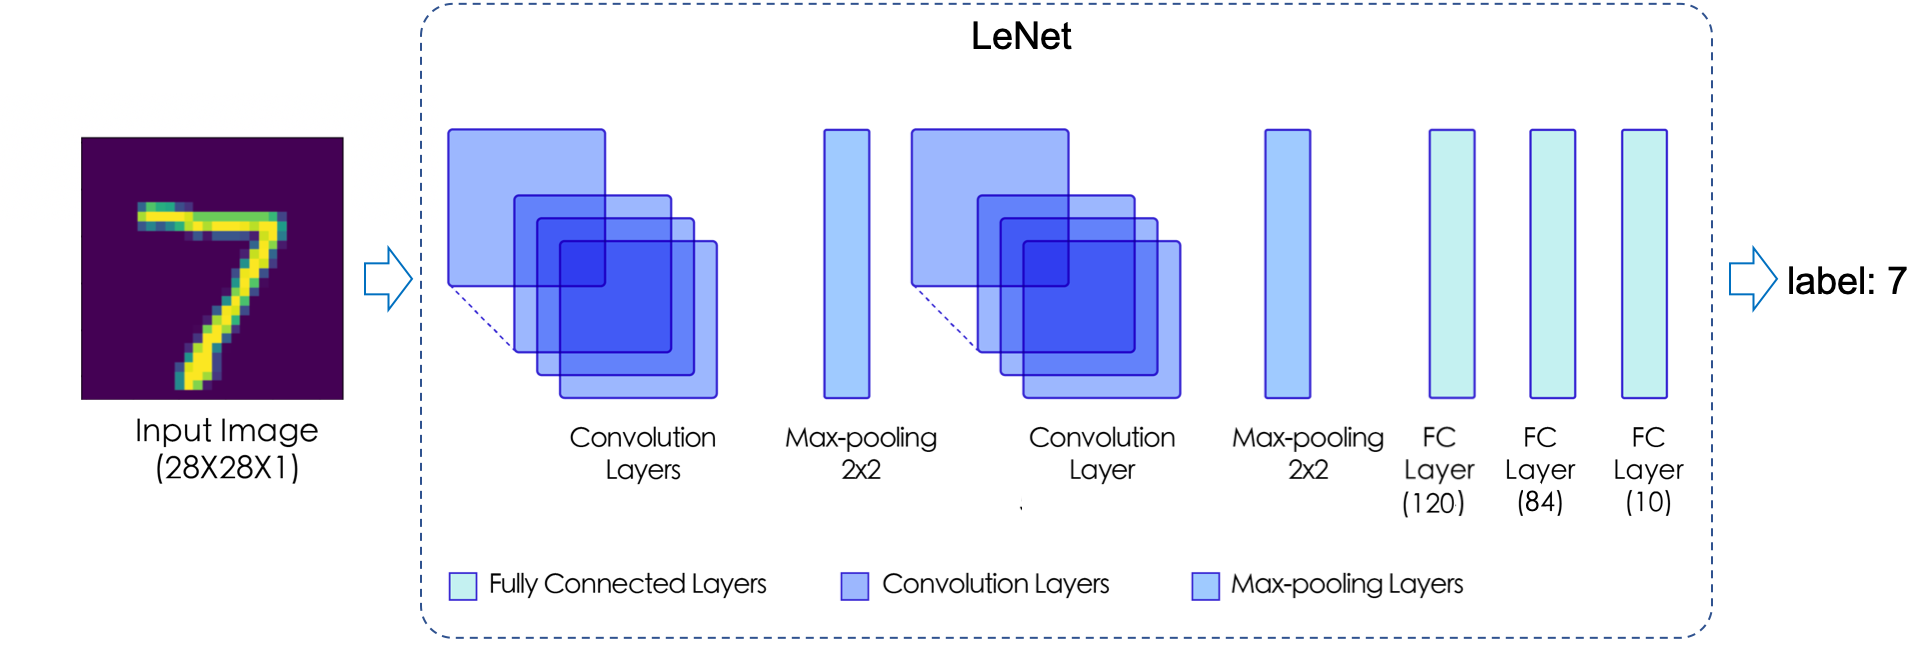

## 使用paddle.nn.Sequential组网

使用该方式构建顺序的线性网络结构（如LeNet, AlexNet, VGG等），只需要按模型的结构顺序，一层一层添加到子类中即可。

In [9]:
# 使用paddle.nn.Sequential构建LeNet模型
lenet_seq = nn.Sequential(
    nn.Conv2D(1, 6, 3, stride=1, padding=1),  # 卷积层
    nn.ReLU(),  # 激活层
    nn.MaxPool2D(2, 2),  # 池化层
    nn.Conv2D(6, 16, 5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2D(2, 2),
    nn.Flatten(),
    nn.Linear(400, 120),  # 全连接层
    nn.Linear(120, 84),
    nn.Linear(84, 10)
)

paddle.summary(lenet_seq, (1, 1, 28, 28))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-9       [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-9        [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
  MaxPool2D-9     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-10      [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-10      [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
 MaxPool2D-10    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Flatten-1      [[1, 16, 5, 5]]          [1, 400]              0       
   Linear-13         [[1, 400]]            [1, 120]           48,120     
   Linear-14         [[1, 120]]            [1, 84]            10,164     
   Linear-15         [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
----------------------------------------

{'total_params': 61610, 'trainable_params': 61610}

## 使用paddle.nn.Layer组网

构建比较复杂的网络结构，主要包括三个步骤：
1. 创建一个继承自paddle.nn.Layer的类
2. 在类的构造函数`__init__`中定义组网用到的神经网络
3. 在类的前向计算函数`forward`中使用定义好的layer执行前向计算

In [10]:
# 使用paddle.nn.Layer构建LeNet模型
class MyLeNet(nn.Layer):
    def __init__(self, num_classes=10):
        super(MyLeNet, self).__init__()
        self.num_classes = num_classes
        
        # 构建features子网，对输入图像进行特征提取
        self.features = nn.Sequential(
            nn.Conv2D(1, 6, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(2, 2),
            nn.Conv2D(6, 16, 5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2D(2, 2)
        )
        
        # 构建linear子网，用于分类
        if num_classes > 0:
            self.linear = nn.Sequential(
                nn.Linear(400, 120),
                nn.Linear(120, 84),
                nn.Linear(84, num_classes)
            )
    
    def forward(self, inputs):
        x = self.features(inputs)
        
        if self.num_classes > 0:
            x = paddle.flatten(x, 1)
            x = self.linear(x)
            
        return x

In [11]:
my_lenet = MyLeNet()

paddle.summary(my_lenet, (1, 1, 28, 28))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-11      [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-11       [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
 MaxPool2D-11     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-12      [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-12      [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
 MaxPool2D-12    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-16         [[1, 400]]            [1, 120]           48,120     
   Linear-17         [[1, 120]]            [1, 84]            10,164     
   Linear-18         [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

{'total_params': 61610, 'trainable_params': 61610}